# Análisis 02  Comparación de huellas térmicas
<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/docs/logo_unal_color.png" alt="drawing" width="200"/>

## Lecutra de datos y organización de los datos

In [17]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_excel('San Pedro.xlsx', header=None, skiprows=3)

In [11]:
df.head()

0         1   2       3       4       5       6       7       8   \
0 2018-05-04  00:00:00 NaN  12.413  15.915  18.081  16.106  94.455  71.558   
1 2018-05-04  00:15:00 NaN  12.098  15.772  18.033  15.915  94.423  71.818   
2 2018-05-04  00:30:00 NaN  11.977  15.629  17.986  15.748  93.314  72.076   
3 2018-05-04  00:45:00 NaN  11.977  15.509  17.915  15.557  93.802  71.882   
4 2018-05-04  01:00:00 NaN  11.832  15.438  17.867  15.414  93.610  71.753   

       9    ...        19  20      21      22      23      24      25      26  \
0  70.382   ...    77.150 NaN  12.413  15.605  15.605  15.676  94.455  81.175   
1  70.460   ...    78.107 NaN  12.098  15.557  15.557  15.652  94.423  81.026   
2  70.451   ...    78.092 NaN  11.977  15.509  15.485  15.581  93.314  80.602   
3  70.351   ...    77.844 NaN  11.977  15.461  15.414  15.533  93.802  80.370   
4  70.255   ...    77.484 NaN  11.832  15.414  15.366  15.485  93.610  80.277   

       27      28  
0  80.733  80.361  
1  80.584  80.190  
2  80.209  79.759  
3  80.028  79.471  
4  79.962  79.322  

[5 rows x 29 columns]

A continuación vamos a organizar los datos para crear un marco de datos general.

In [177]:
# Para seleccionar las columnas con los datos
ind1 = np.arange(start=3,  stop=11, step=1)
ind2 = np.arange(start=12, stop=20, step=1)
ind3 = np.arange(start=21, stop=29, step=1)

# Para extraer los datos de las tres casas
df1 = df.iloc[:, ind1]
df2 = df.iloc[:, ind2]
df3 = df.iloc[:, ind3]

# Para colocarle nombre a las variables
nombres = ["text", "tsal", "tha1", "tha2", "hext", "hsal", "hha1", "hha2"]
df1.columns = nombres
df2.columns = nombres
df3.columns = nombres

casas = np.repeat(['Casa 1', 'Casa 2', 'Casa 3'], 32256)

# Juntando todos
dfs = pd.concat([df1, df2, df3]) # como rbind
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32256 entries, 0 to 10751
Data columns (total 8 columns):
text    32256 non-null float64
tsal    32256 non-null float64
tha1    32256 non-null float64
tha2    32256 non-null float64
hext    32256 non-null float64
hsal    32256 non-null float64
hha1    32256 non-null float64
hha2    32256 non-null float64
dtypes: float64(8)
memory usage: 2.2 MB


array(['Casa 1', 'Casa 1', 'Casa 1', 'Casa 1', 'Casa 2', 'Casa 2',
       'Casa 2', 'Casa 2', 'Casa 3', 'Casa 3', 'Casa 3', 'Casa 3'],
      dtype='<U6')

## Aplicando componentes principales

In [157]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = dfs.loc[:, nombres].values
print('Variables sin estandarizar \n')
print(x, '\n')

# Standardizing the features
x = StandardScaler().fit_transform(x)
print('Variables luego de la estandarización \n')
print(x)

Variables sin estandarizar 

[[12.413 15.915 18.081 ... 71.558 70.382 67.719]
 [12.098 15.772 18.033 ... 71.818 70.46  68.15 ]
 [11.977 15.629 17.986 ... 72.076 70.451 68.439]
 ...
 [18.295 17.796 17.796 ... 65.584 66.469 65.25 ]
 [18.176 17.677 17.653 ... 65.682 66.562 65.314]
 [18.033 17.534 17.51  ... 65.775 66.624 65.353]] 

Variables luego de la estandarización 

[[-0.87822807 -0.70371149  0.43844984 ...  0.44184407 -0.01271076
   0.11058404]
 [-0.95101137 -0.754314    0.41023586 ...  0.46889997 -0.0018824
   0.14555622]
 [-0.97896941 -0.80491651  0.38260966 ...  0.49574774 -0.00313183
   0.16900624]
 ...
 [ 0.4808558  -0.03809381  0.2709293  ... -0.17981721 -0.55593346
  -0.08975544]
 [ 0.45335989 -0.08020359  0.18687513 ... -0.16961921 -0.54302273
  -0.08456236]
 [ 0.42031858 -0.13080611  0.10282096 ... -0.15994153 -0.53441557
  -0.08139782]]


In [184]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

principalDf.head()

pc1       pc2
0 -1.108858 -0.957307
1 -1.202478 -0.982720
2 -1.249704 -0.961996
3 -1.298329 -0.989824
4 -1.347593 -1.009231

In [223]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

NameError: name 'X_pca' is not defined

In [222]:
principalComponents.shape

(32256, 2)

## Representando las componentes

In [182]:
import matplotlib.pyplot as plt

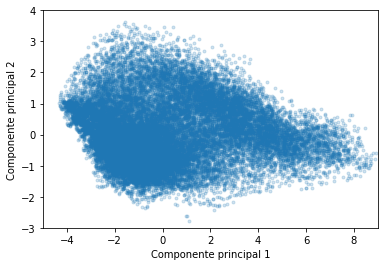

In [213]:
plt.ylim(-3, 4)
plt.xlim(-5, 9)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.scatter(principalDf.pc1, principalDf.pc2, marker='.', alpha=0.2);

shape of X_pca (32256, 8)
[0.75913364 0.11375189 0.07494805 0.0318197  0.01335277 0.00403471
 0.00191694 0.0010423 ]
suma: 0.9930060519927479


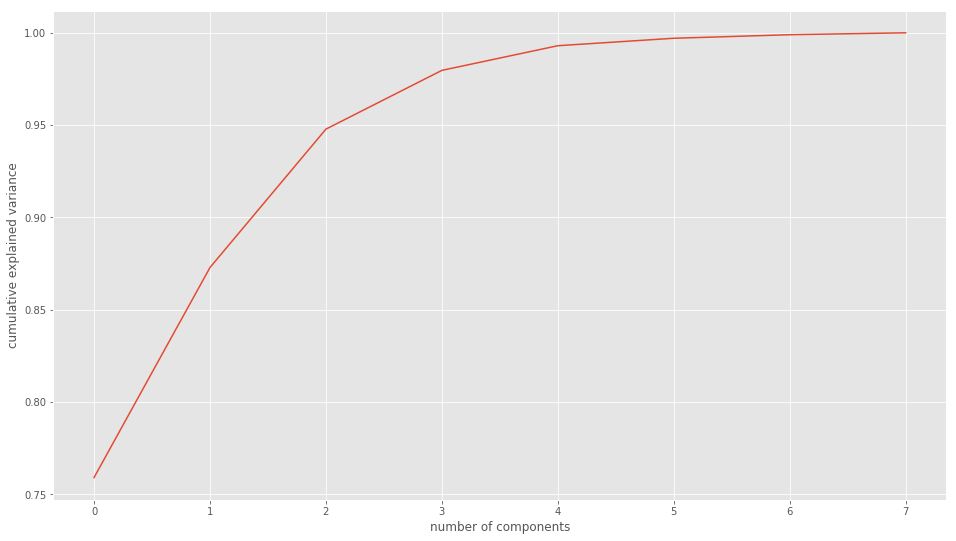

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#normalizamos los datos
df = dfs
scaler=StandardScaler()
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=8) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

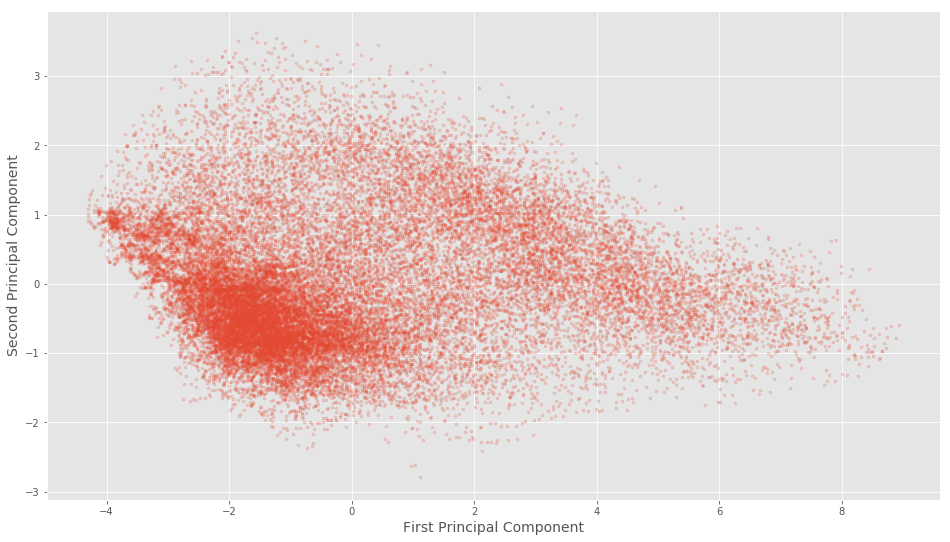

In [253]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]
plt.scatter(pc1, pc2, marker='.', alpha=0.2);
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.show()